<a href="https://colab.research.google.com/github/diatomicDisaster/Quantum-Computing-Workbook/blob/main/Quantum_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install pylatexenc
!apt install texlive-latex-recommended

In [ ]:
import qiskit as qk
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import random_statevector, Statevector
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
backend = qk.Aer.get_backend('qasm_simulator')

style = {}

# Uncomment this block if you are using Colab dark theme
# style = {'backgroundcolor': "#00000000", 'linecolor': "#ffffff", 'textcolor': "#ffffff"}
# mpl.rcParams['text.color'] = "#ffffff"
# mpl.rcParams['axes.labelcolor'] = "#ffffff"
# mpl.rcParams['xtick.color'] = "#ffffff"
# mpl.rcParams['ytick.color'] = "#ffffff"

#**Getting an IMBQ Token**
<a id='IBMQ_token'></a>

To get started, visit [IBM Quantum Experience](https://quantum-computing.ibm.com/) and select *Create an IBMid account* to create an account. Once you've followed the steps to register for an account, you should be able to log into your dashboard. First, go to *My Account* in the top right drop-down menu.

<img src="https://drive.google.com/uc?id=1MzusKbj1v2G6HlG4kEzQJ-hKLCwMjW8r" align="center"/>

From here you can copy your API token, or generate it if you do not already have one.

<img src="https://drive.google.com/uc?id=1sk_yVmh4XCgXOvVDniwLVqCBkqaytiqZ" align="center"/>

# **The Qubit**

The qubit is the fundamental unit of quantum computation, a coherent superposition of two orthonormal states:

$$
\left|\psi\right> = a \left|0\right> + b \left|1\right>  \qquad a,b \in \mathbb{C}
$$

Common examples of physical qubits are the electron spin or photon polarization. 

We operate on a classical bit by changing it's state from 0 to 1 or vice versa. A qubit is operated on by rotating it's Bloch vector, altering the linear superposition. 

## **The Bloch Sphere**

We represent the state of a qubit as a vector on a unit two-sphere, known as the Bloch sphere. The positive and negative $z$-axes correspond to the two orthonormal basis states of the qubit.

To see what this looks like, let's set up a simulation of a qubit. First we'll create a register with a single qubit, and add it to our quantum circuit, before initializing the register in a random state.

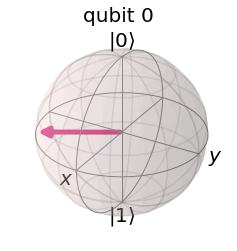

In [ ]:
qr = qk.QuantumRegister(1) # create quantum register with single qubit
qc = qk.QuantumCircuit(qr) # add the register to our circuit
qc.initialize(random_statevector(2).data, 0) # initialize register in random state

plot_bloch_multivector(Statevector.from_instruction(qc)) # plot the qubit's Bloch sphere

## **Operations as Rotations on the Bloch Sphere**
The polar angle is $\theta$ and the azimuthal angle $\phi$ such that

$$
\left|\psi\right> = \cos(\theta/2) \left|0\right> + e^{i\phi}\sin(\theta/2) \left|1\right>
$$

We represent operations on the qubit as rotations of the Bloch vector. The elemental rotations are the Pauli matrices, which correspond to $\pi$ rotations about the Cartesian $x$, $y$ and $z$ axes

\begin{gather}
X = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\qquad
Y = 
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}
\qquad
Z = 
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix} \\[1em]
\left|0\right> =
\begin{bmatrix}
1 \\
0
\end{bmatrix} 
\qquad
\left|1\right> =
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\end{gather}

The $X$ matrix represents a bit flip operation, switching the $\left|0\right>$ and $\left|1\right>$ states

$$
X \big( a \left|0\right> + b \left|1\right> \big) = a \left|1\right> + b \left|0\right>
$$

The Z matrix represents a phase flip operation, changing the relative sign of the superposition

$$
Z \big( a \left|0\right> \pm b \left|1\right> \big) = a \left|0\right> \mp b \left|0\right>
$$

The Y matrix represents the combination of the two
$$
Y \big( a \left|0\right> \pm b \left|1\right> \big) = ai \left|1\right> \mp bi \left|0\right>
$$

Let's try some of these rotations. First we'll initialize a register with two qubits in the state $\left|\psi\right> = \left|0\right>$, and apply the Pauli $X$ matrix to the second qubit.

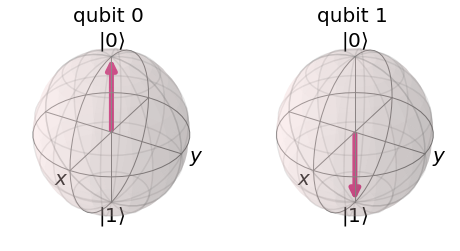

In [ ]:
qr = qk.QuantumRegister(2) # quantum register with two qubits
qc = qk.QuantumCircuit(qr)

qc.x(1) # apply the Pauli X operator to the second qubit

plot_bloch_multivector(Statevector.from_instruction(qc))

The Pauli $X$ matrix performs a rotation of $\pi$ radians, swapping the state of the qubit.

$$
X\left|0\right> = \left|1\right>
$$

The Pauli matrices are Hermitian, so applying the $X$ matrix a second time rotates the Bloch vector back to it's original position

\begin{align}
XX\left|0\right> &= X\left|1\right> = \left|0\right> \\
&= XX^\dagger\left|0\right> = \left|0\right>
\end{align}

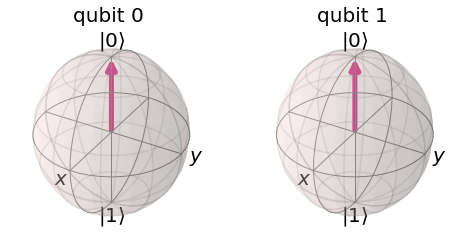

In [ ]:
qc.x(1) # apply X to the second qubit again

plot_bloch_multivector(Statevector.from_instruction(qc))

## **PQ Coin Toss**

The USS Enterprise is facing an imminent catastrophe, and captain Picard must find a way to save his crew. Suddenly the omnipotent Q appears, and offers to rescue the ship if Picard can beat him at a simple game. The setup is as follows:

1.   Q places a quantum coin in a small box, heads up (Picard may check this if he likes).
2.   They then take turns, starting with Q, to perform a quantum operation on the coin: either leaving the coin in the state 'heads up', $\left|0\right>$, or flipping the coin to 'tails up', $\left|1\right>$. These operations correspond to applying the identity matrix, $I$, and the Pauli $X$ matrix, respectively.
3.   After Q's second turn, they open the box, and if the coin is still heads up, then Q wins. If it is tails up, Picard wins.

It seems Picard has a 50:50 chance of winning. After Q takes his first turn Picard can choose to leave the qubit in either the state $\left|0\right>$, or the state $\left|1\right>$, thereby randomising the result of Q's final flip. No?
\
\
<centre><img src="https://drive.google.com/uc?id=1BHpBK-ksSTjj_x83QzZLtCsqLTAjyjGp"/></centre>


## The Twist

Unfortunately, Q is a tricksy individual, and he knows of a third coin flip, called the Hadamard, which will guarantee that Q wins the game *every single time*

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

Using this trick, Q can ensure the qubit is always in the state $\left|0\right>$ at the end of the game, no matter whether Picard flips the coin or not. Let's see how the Hadamard works.

We initialize a quantum register with a single qubit in the $\left|0\right>$ state. We also create a classical register with a single classical bit. This will be used to store the result of the final measurement of the qubit either $\left|0\right>$ or $\left|1\right>$.


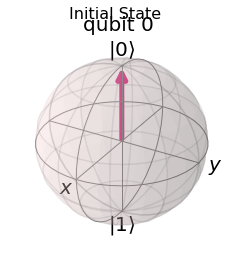

In [ ]:
qr = qk.QuantumRegister(1, "q")
cr = qk.ClassicalRegister(1, "c")
qc = qk.QuantumCircuit(qr, cr)

plot_bloch_multivector(Statevector.from_instruction(qc), title="Initial State")


Q then applies his Hadamard flip, which acts on the quantum coin to create an equal superposition of 'heads' and 'tails'.

$$
H\left|0\right> 
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
= \frac{1}{\sqrt{2}} \big( \left|0\right> + \left|1\right>\big) = \left|+\right>
$$

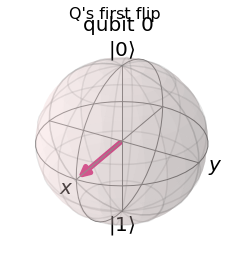

In [ ]:
qc.h(0) # Q applies the first Hadamard gate

plot_bloch_multivector(Statevector.from_instruction(qc), title="Q's first flip")

Picard can either leave the qubit in the superposition state $\left|+\right>$ (applying the identity, $\mathbb{I}$), or perform the Pauli $X$ operation to flip the coin. If he applies the flip:

$$
X\left|+\right> = \frac{1}{\sqrt{2}}
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
1
\end{bmatrix}
=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
1
\end{bmatrix}
= \left|+\right>
$$

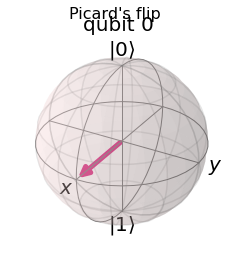

In [ ]:
qc.x(0) # Picard applies the Pauli X gate

plot_bloch_multivector(Statevector.from_instruction(qc), title="Picard's flip")

In the equal superposition, the bit flip operator leaves the qubit's state unchanged. Q then simply applies the Hadamard once more, to transform the qubit back to it's original state

$$
H\left|+\right> = \left|0\right>
$$

In [ ]:
qc.h(0) # Q applies a second Hadamard gate

plot_bloch_multivector(Statevector.from_instruction(qc), title="Q's second flip")
qc.measure(qr, cr)

Now, when we perform a measurement on the qubit, we find it in the state $\left|0\right>$ with unit probability.

In [ ]:
result = qk.execute(qc, backend, shots=1).result().get_counts()
print("The result of the measurement is: |{0}>".format([*result][0]))

The result of the measurement is: |0>


The quantum circuit for this series of operations, with the qubit initialized in the state $\left|0\right>$

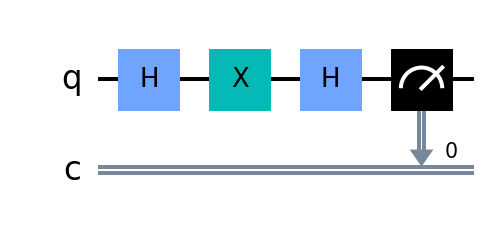

In [ ]:
qc.draw(output="mpl", style=style, scale=2)

## **Measurement**
<a id='measurement'></a>

At the end of the PQ coin toss game we performed a measurement of the qubit's state. Specifically, we performed a projective measurement or projection-valued measurement (PVM), in the computational basis $\{\left|0\right>, \left|1\right>\}$. This measurement is described by the Pauli-$Z$ matrix we saw earlier

\begin{align}
Z \left|0\right> &= + 1 \left|0\right> \\
Z \left|1\right> &= -1 \left|1\right>
\end{align}

and is a projective measurement along the positive $z$-axis of the Bloch sphere. The Eigenvalues $\pm 1$ correspond to the possible results of the measurement.

### **Measurement Along Arbitrary Axes**

A unit axis $\hat{n}$, described by the angles $\theta$ and $\phi$ on the Bloch sphere, has the PVM

$$
\sigma_\hat{n} = 
\begin{bmatrix}
\cos\theta & e^{-i\phi}\sin\theta \\
e^{i\phi}\sin\theta & -\cos\theta
\end{bmatrix}
$$

which has an Eigenstate corresponding to the $+1$ Eigenvalue given by

$$
\left|0\right>_\hat{n} =
\begin{bmatrix}
e^{-i\frac{\phi}{2}}\cos\frac{\theta}{2} \\
e^{i\frac{\phi}{2}}\sin\frac{\theta}{2}
\end{bmatrix}
$$

### **Arbitrary Measurements in the Computational Basis**

For example, we could perform a projective measurement onto the equal superposition states, which form an orthonormal basis on the Bloch sphere

\begin{align}
\left|+\right> &= \frac{1}{\sqrt{2}} \big( \left|0\right> + \left|1\right> \big) \\
\left|-\right> &= \frac{1}{\sqrt{2}} \big( \left|0\right> - \left|1\right> \big)
\end{align}

which correspond to the Bloch vectors $\hat{n}_{+} = (\pi/2, 0)$ and $\hat{n}_{-} = (\pi/2, \pi)$, respectively. The measurement operator that projects the state of a qubit onto this basis is the Pauli $X$ matrix.

However, quantum computers performs every read-out measurement in the computational basis, $\{\left|0\right>, \left|1\right>\}$. To perform a PVM in the polar basis, we must construct the Pauli $X$ gate in terms of the measurement operator for the computational basis (the Pauli $Z$ gate)

$$
\sigma_{\left|+\right>} = X = HZH 
= \frac{1}{2}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
= \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$

we do this using the Hadamard, which transforms between the computational and polar bases.

Let's see what this measurement circuit looks like...

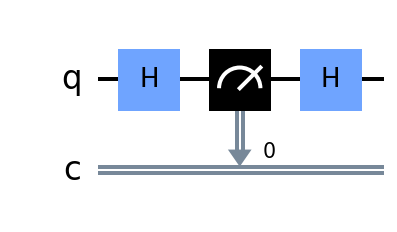

In [ ]:
def meas_polar(qubit, bit, circuit):
  '''Measure in the polar basis'''
  circuit.h(qubit)
  circuit.measure(qubit, bit)
  circuit.h(qubit)
  return circuit

qr = qk.QuantumRegister(1, "q")
cr = qk.ClassicalRegister(1, "c")
qc = qk.QuantumCircuit(qr, cr)

qc = meas_polar(qr[0], cr[0], qc)

qc.draw(output='mpl', style=style, scale=2)

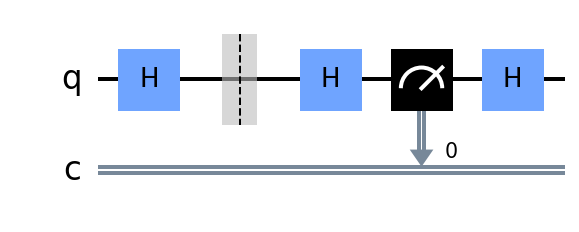

In [ ]:
qr = qk.QuantumRegister(1, "q")
cr = qk.ClassicalRegister(1, "c")
qc = qk.QuantumCircuit(qr, cr)

qc.h(0)
qc.barrier()
qc = meas_polar(qr[0], cr[0], qc)

qc.draw(output='mpl', style=style, scale=2)

In [ ]:
job = qk.execute(qc, backend, shots=1000) # execute the circuit 1000 times
result = job.result().get_counts()
print(result)

{'0': 1000}


We project the qubit onto the computational basis state, $\left|0\right>_\text{c}$, with unit probability. Thus, if Picard had suspected Q of foul play, he could have performed a measurement in the polar basis, obtaining the result $\left|0\right>_c$, and exposing Q's trickery.

What if we measure the state of the qubit in the computational basis before our measurement in the polar basis?

{'0 0': 257, '0 1': 243, '1 0': 245, '1 1': 255}


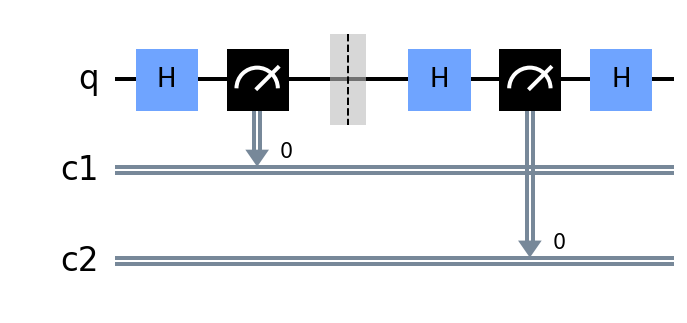

In [ ]:
qr = qk.QuantumRegister(1, "q")
cr1 = qk.ClassicalRegister(1, "c1") # one register for each measurement
cr2 = qk.ClassicalRegister(1, "c2")
qc = qk.QuantumCircuit(qr, cr1, cr2)

qc.h(0)
qc.measure(qr[0], cr1[0])
qc.barrier()
qc = meas_polar(qr[0], cr2[0], qc)

job = qk.execute(qc, backend, shots=1000) # execute the circuit 1000 times
result = job.result().get_counts()
print(result)

qc.draw(output='mpl', style=style, scale=2)

When we perform a measurement of the superposition state $\left|+\right>_c$ in the computational basis we collapse the superposition into either the $\left|0\right>_c$ or $\left|1\right>_c$ state, each with probability $1/2$. In the polar basis

\begin{align}
\left|0\right>_c &= \left|+\right>_p \\
\left|1\right>_c &= \left|-\right>_p
\end{align}

So that when we measure in the computational basis, we obtain either $\left|0\right>_p$ or $\left|1\right>_p$ each with probability $1/2$. 

This is the Stern-Gerlach experiment in action!



# **Combining Qubits**

## **Quantum Circuits**

Now we have a general idea of how to apply single qubit operations. We have just seen how the Hadamard gate can be used to prepare an equal superposition of states, for which a measurement obtains the results $\left|0\right>$ and $\left|1\right>$ with equal probability. But to do anything very interesting we have to network some qubits together.

To start let's initialize a quantum register with 4 qubits, and a classical register with 4 classical bits. The classical register will be used to store the results of a measurement on each of the qubits.

In [ ]:
qr = qk.QuantumRegister(4, "q") # quantum register with 8 qubits
cr = qk.ClassicalRegister(4, "c") # 8 classical bits to store measurement results
qc = qk.QuantumCircuit(qr, cr)

Now let's try adding a Hadamard gate to each channel in the circuit in order to prepare each of the qubits in an equal superposition state

$$
\left|+\right> = \frac{1}{\sqrt{2}} \big( \left|0\right> + \left|1\right> \big)
$$

Each Hadamard gate can be followed with a measurement of the qubit's state. We perform a projective measurement onto the computational basis $\{\left|0\right> \left|1\right>\}$ which will collapse the superposition. The result of the measurement is then stored in a classical bit from the classical register. We'll also draw the circuit diagram for this quantum circuit. Can you tell what this circuit will do?

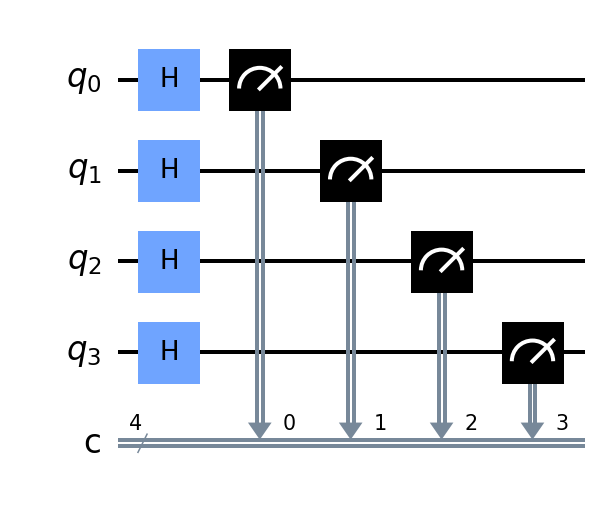

In [ ]:
for i in range(4):
  qc.h(qr[i]) # add a Hadamard gate to each qubit channel
  qc.measure(qr[i], cr[i]) # measure qubit i and store result in classical bit

qc.draw(output="mpl", style=style, scale=2)


So far, we have been using the `qasm_simulator` backend, which simulates the behaviour of a quantum computer on a classical computer. For the circuit above to be a true random number generator (as opposed to a pseudo-random number generator) we have to perform the computation on an actual quantum computer. So now we're going to use the IBM API to send our quantum circuit to a real quantum computer.

To connect to the IBM Athens quantum computer, **replace the empty string below with your own API key**. If you don't have one then leave the string blank and the backend will revert to `qasm_simulator`, or see [getting an IBMQ token](#IBMQ_token) for instructions.

In [ ]:
my_token = '26f68c002cb9dfa874f377e01f2e2b2dd3e5e16d870d800f1d8f94078ec4de6c178c2fca904ccd270fedd13075136f0094ede2819d6474afc1b78e1bd9da28d8' # enter your API token here, e.g my_token = '123456789'

if my_token:
  qk.IBMQ.save_account(my_token)
  acc = qk.IBMQ.load_account()
  quantum_backend = acc.get_backend('ibmq_athens') # Athens quantum computer
else:
  quantum_backend = backend

configrc.store_credentials:WARNING:2020-10-28 14:55:25,682: Credentials already present. Set overwrite=True to overwrite.
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Now we'll set up a job to send to the quantum computer. The number of `shots` determines how many times our circuit is run. Since we only want to generate a single random number, we run the circuit one time.

The results are returned as a dictionary of states for the classical register as keys, and the number of times that result is obtained as the value. In this case we only perform one run of the circuit, so we expect to obtain a single key corresponding to the state of the classical register after the measurements are performed. 

In [ ]:
job = qk.execute(qc, quantum_backend, shots=1) # execute the circuit 1 time
results = job.result().get_counts()
print("The results of a single shot are: {0}".format(results))

IBMQJobFailureError: ignored

Finally, we convert the measurement result stored in the 4-bit classical register to an integer to obtain a random number in the range 

$$0 \leq x \leq (2^4 - 1)$$

In [ ]:
bit_string = [*results][0] # extract the bit string as first key in the dictionary
rand_num = int(bit_string, 2) # convert bit string to integer
print("The random number is: {0}*(2^3) + {1}*(2^2) + {2}*(2^1) + {3}*(2^0) = {4} ".format(*[i for i in bit_string], rand_num))

The random number is: 1*(2^3) + 1*(2^2) + 1*(2^1) + 0*(2^0) = 14 


Alter the number of shots below to see how the resultant histogram of measurement results changes as the number of repeat measurements, $N$, increases. For a random number generator, we should approach a uniform distribution as $N \rightarrow \infty$.

The counts for 1000000 shots are: {'0000': 62256, '0001': 62836, '0010': 62410, '0011': 62368, '0100': 62214, '0101': 62528, '0110': 62567, '0111': 62530, '1000': 62651, '1001': 62506, '1010': 62579, '1011': 62597, '1100': 62483, '1101': 62863, '1110': 62336, '1111': 62276}



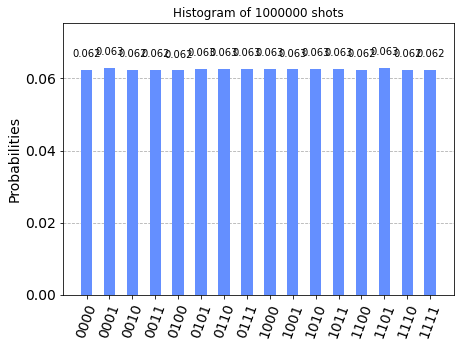

In [ ]:
n_shots = 1e6 # number of times to run the circuit

job = qk.execute(qc, quantum_backend, shots=n_shots)
results = job.result().get_counts()

print("The counts for {0} shots are: {1}\n".format(int(n_shots), results))
plot_histogram(results, title="Histogram of {0} shots".format(int(n_shots)))

## **The CNOT Gate**

Controlled operations form the basis of both quantum and classical computers. They are multi-bit operations in which one or more 'control' bits inform the computer what operation to perform on one or more 'target' bits. They are logical if/else statements of the form

$$
\text{if A is true, then do B}
$$

The fundamental controlled operation is the *controlled not*, or CNOT. The CNOT gate has two inputs: the *control qubit* and the *target qubit*. It acts on the target qubit according to the state of the control qubit.

$$
\left|c\right> \left|t\right> \longrightarrow \left|t \oplus c\right>
$$

i.e if the control bit is $\left|1\right>$ then the target bit is flipped, if the control bit is $\left|0\right>$ we apply the identity. We represent the two qubits with the tensor product of their respective spaces

$$
\left|00\right> =
\begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
\end{bmatrix}
\qquad
\left|10\right> =
\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
\end{bmatrix}
\qquad
\left|01\right> =
\begin{bmatrix}
0 \\
0 \\
1 \\
0 \\
\end{bmatrix}
\qquad
\left|11\right> =
\begin{bmatrix}
0 \\
0 \\
0 \\
1 \\
\end{bmatrix}
$$

The CNOT gate is written

$$
\text{CNOT} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix} \\[1em]
$$

Lets initialise a quantum circuit with a two qubit register in the state $\left|00\right>$, we'll add a CNOT gate with the 0th qubit as the control and the 1st qubit as the target. We'll also add a classical two bit register to store the outcome of a measurement of both the qubits.

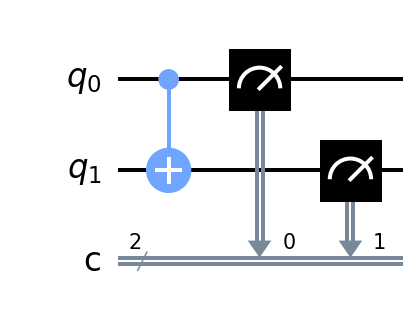

In [ ]:
qr = qk.QuantumRegister(2, "q")
cr = qk.ClassicalRegister(2, "c")
qc = qk.QuantumCircuit(qr, cr)
qc.cx(qr[0], qr[1]) # CNOT gate 0th qubit is control, 1st qubit is target
qc.measure(qr, cr)

qc.draw(output="mpl", style=style, scale=2)

In [ ]:
job = qk.execute(qc, backend, shots=1024) # we perform 1024 independent measurements of the cicuit
result = job.result()

print(result.get_counts())

{'00': 1024}


The control bit enters the CNOT gate in the $\left|0\right>$ state. This tells the gate to apply no operation to the target bit. The state of the register is unchanged, and so we expect to measure the $\left|00\right>$ state after the CNOT gate with unit probability. All 1024 measurements of the quantum register after applying the CNOT gate gave the same result

$$
\text{CNOT} \left|00\right> = \left|00\right>
$$

Now let's try again, but this time we'll set the control bit to the state $\left|1\right>$ using the Pauli $X$ gate before it enters the CNOT gate.

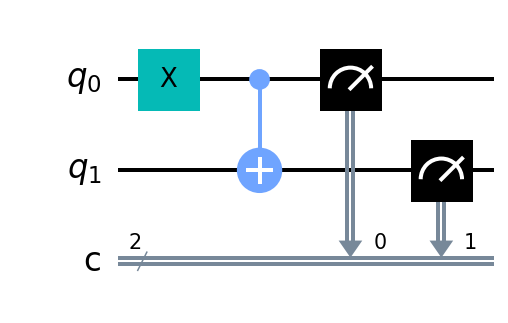

In [ ]:
# Create a quantum circuit with one quantum register and one classical register
qr = qk.QuantumRegister(2, "q")
cr = qk.ClassicalRegister(2, "c")
qc = qk.QuantumCircuit(qr, cr)

qc.x(qr[0]) # flip the control qubit |0> -> |1>
qc.cx(qr[0], qr[1]) # CNOT gate 0th qubit is control, 1st qubit is target
qc.measure(qr, cr) # measure the result of the computation

job = qk.execute(qc, backend, shots=1024)
result = job.result()
qc.draw(output="mpl", style=style, scale=2)

In [ ]:
print("The measurement results are: ", result.get_counts())

The measurement results are:  {'11': 1024}


The control bit entered the CNOT gate in the $\left|1\right>$ state, this tells the gate to flip the state of the target bit, from $\left|0\right>$ to $\left|1\right>$. When we project the state of the register onto the two-qubit basis, we measure the state $\left|11\right>$ with unit probability. Again, all 1024 measurements give

$$
\text{CNOT}\left|10\right> = \left|11\right>
$$

What happens if we prepare the control qubit in a superposition state? For example, by applying the Hadamard to the control bit initially

$$
\left|q_0\right> = H \left|0\right> = \frac{1}{\sqrt{2}} \big( \left|0\right> + \left|1\right> \big)
$$

So that the register is in the state

$$
\left|q_0 q_1 \right> = \frac{1}{\sqrt{2}} \big(\left|00\right> + \left|10\right>\big)
$$

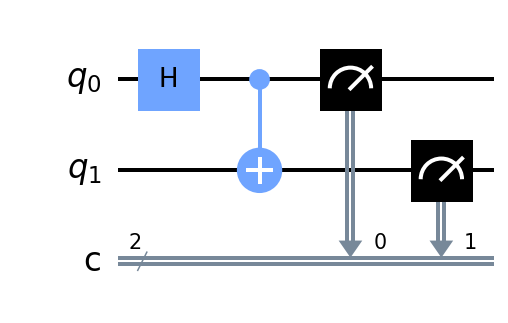

In [ ]:
qr = qk.QuantumRegister(2, "q")
cr = qk.ClassicalRegister(2, "c")
qc = qk.QuantumCircuit(qr, cr)

qc.h(qr[0]) # apply the Hadamard to the control bit
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)

job = qk.execute(qc, backend, shots=1024)
result = job.result()
qc.draw(output="mpl", style=style, scale=2)

In [ ]:
print("The measurement results are: ", result.get_counts())

The measurement results are:  {'00': 513, '11': 511}


We obtain the results $\left|00\right>$ and $\left|11\right>$ each with $P \approx 0.5$. 

$$
\text{CNOT} \frac{\big( \left|00\right> + \left|10\right> \big)}{\sqrt{2}} = \frac{\big( \left|00\right> + \left|11\right> \big)}{\sqrt{2}}
$$

## **Bell States and Entanglement**

We have created a very specific state here, known as a Bell state. In particular this state is one of the Bell basis states, which span the four-dimensional Hilbert space of the two-qubit register.

\begin{align}
\left|\Phi^+\right> &= \frac{1}{\sqrt{2}} \big(\left|00\right> + \left|11\right>\big) \\
\left|\Phi^-\right> &= \frac{1}{\sqrt{2}} \big(\left|00\right> - \left|11\right>\big) \\
\left|\Psi^+\right> &= \frac{1}{\sqrt{2}} \big(\left|01\right> + \left|10\right>\big) \\
\left|\Psi^-\right> &= \frac{1}{\sqrt{2}} \big(\left|01\right> - \left|10\right>\big)
\end{align}

The state we have measured above is the $\Phi^+$ Bell basis state. These basis states have the special property of being *maximally entangled* states. Entangled states have no classical analogue, and their interesting properties form the basis of quantum communication.

Let's prepare a register in the $\left|\Phi^+\right>$ state again. Except this time, after we've prepared the Bell state we'll only measure the target qubit. This is known as a local measurement, in which we project the state of the target qubit $\left|q_1\right>$ onto the single-qubit basis $\{\left|0\right>, \left|1\right>\}$.

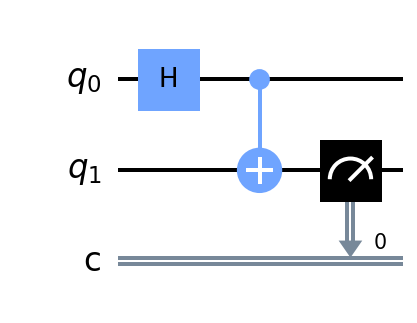

In [ ]:
qr = qk.QuantumRegister(2, "q") # quantum register has two qubits
cr = qk.ClassicalRegister(1, "c") # single bit classical register
qc = qk.QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr[1], cr) # measure q1 and store result in c register

job = qk.execute(qc, backend, shots=1000)
result = job.result()
qc.draw(output="mpl", style=style, scale=2)

In [ ]:
print("The measurement results are: ", result.get_counts())

The measurement results are:  {'0': 473, '1': 527}


Perhaps this is not too suprising, after all, the CNOT gate appears to have prepared $q_1$ in a superposition state with equal probability of being $\left|0\right>$ or $\left|1\right>$:

$$
\text{CNOT} \frac{\big( \left|00\right> + \left|10\right> \big)}{\sqrt{2}} = \frac{\big( \left|00\right> + \left|11\right> \big)}{\sqrt{2}} = \left|\Phi^+\right>
$$

In the [Measurement](#measurement) section we saw how the single qubit superposition state $\left|+\right> = \frac{1}{\sqrt{2}}\big( \left|0\right> + \left|1\right> \big)$ can be measured in the polar basis $\left\{\left|0\right>_p, \left|1\right>_p\right\}$, with unit probability of obtaining the result $\left|0\right>_p$. 

What happens if we perform the same measurement on $q_1$ in the circuit above?

The measurement results are:  {'0': 465, '1': 535}


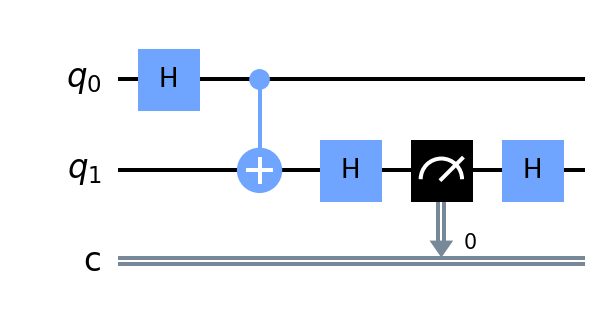

In [ ]:
qr = qk.QuantumRegister(2, "q") # quantum register has two qubits
cr = qk.ClassicalRegister(1, "c") # single bit classical register
qc = qk.QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc = meas_polar(qr[1], cr, qc) # measure q1 and store result in c register

job = qk.execute(qc, backend, shots=1000)
result = job.result().get_counts()
print("The measurement results are: ", result)
qc.draw(output="mpl", style=style, scale=2)

Instead of measuring $\left|0\right>$ every time, we obtain the results $\left|0\right>_p = \left|+\right>_c$ and $\left|1\right>_p = \left|-\right>_c$ with equal probability. In the two qubit state

$$
\left|\Phi^-\right> = \frac{1}{\sqrt{2}} \big( \left|00\right> + \left|11\right> \big)
$$

A measurement of *either* qubit along *any* axis gives a completely random result. In other words, there is no single qubit basis in which it is possible to determine with certainty, the state of the qubit. Let's the check the limit as the number of shots increases

$$\lim_{N \rightarrow \infty} P = ?$$

Text(0.5, 0, 'shots')

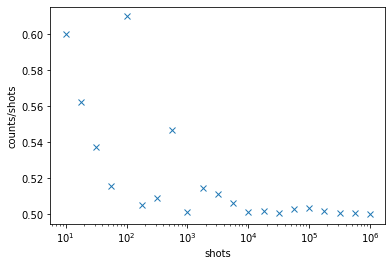

In [ ]:
probs = []
n_shots = [10**(n/4) for n in range(4, 25)]
for shots in n_shots:
  job = qk.execute(qc, backend, shots=shots)
  counts = list(job.result().get_counts().values())
  probs.append(0.5 + abs(0.5 - counts[0]/shots)) # select larger of the two probabilities
plt.plot(n_shots, probs, ls='', marker='x')
plt.xscale('log')
plt.ylabel("counts/shots")
plt.xlabel("shots")
  

Mathematically, measuring a single qubit in the entangled two-qubit register is equivalent to taking the partial trace over the control qubit of the quantum register's density matrix, $\rho_\text{AB}$. For the $\Phi^+$ Bell state this is

\begin{align}
\rho_{q_1q_2} &= \left|\Phi^-\right> \left<\Phi^-\right| 
= \frac{1}{2} \big( \left|00\right>\left< 00\right| +  \left|00\right>\left< 11\right| +  \left|11\right>\left< 00\right| +  \left|11\right>\left< 11\right| \big) \\
&= \frac{1}{2}
\begin{bmatrix}
1 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1
\end{bmatrix}
\end{align}

Such that the density matrix of the target qubit is a multiple of the identity matrix:

\begin{align}
\rho_{q_1} &= \text{Tr}_{q_0} \big(\left|\Phi^-\right> \left<\Phi^-\right| \big) = \sum_{i, j = 0, 1} \left<i\right|_{q_0}\left|\Phi^-\right> \left<\Phi^-\right| \left|j\right>_{q_0} = \frac{1}{2}  \big( \left| 0\right>\left< 0\right| +  \left|1\right>\left< 1\right| \big) \\[.5em]
&= \frac{1}{2}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
+ \frac{1}{2}
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
= \frac{1}{2}
\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix} 
+ \frac{1}{2}
\begin{bmatrix}
0 & 0 \\
0 & 1
\end{bmatrix} \\
&= \frac{1}{2} \mathbb{1}
\end{align} 

Physically, this means that if we measure the state of $q_1$ along *any* axis, $\hat{n}(\theta, \phi)$, the result is completely random - i.e we obtain the results $\left|0\right>\left< 0\right|$ and $\left|1\right>\left< 1\right|$ each with probability 0.5

\begin{align}
P\big(q_1 = \hat{n}\big) &= \left|\left< \hat{n} | q_1 \right>\right|^2 = \left< \hat{n} | q_1 \right>\left< q_1 | \hat{n} \right> = \left< \hat{n} | \rho_{q_1} | \hat{n} \right> \\[1em]
&= \frac{1}{2}
\begin{bmatrix}
e^{-i\frac{\theta}{2}}\cos\frac{\theta}{2} &
e^{i\frac{\theta}{2}}\sin\frac{\theta}{2}
\end{bmatrix} 
\begin{bmatrix}
1 & 0 \\[1em]
0 & 1
\end{bmatrix}
\begin{bmatrix}
e^{i\frac{\theta}{2}}\cos\frac{\theta}{2} \\
e^{-i\frac{\theta}{2}}\sin\frac{\theta}{2}
\end{bmatrix} = \frac{1}{2} \left( \cos^2 \frac{\theta}{2} + \sin^2 \frac{\theta}{2} \right) \\
&= \frac{1}{2}
\end{align}